# Hypothesis Testing

Hypothesis tests use data from a sample to make an inference about the value of a population parameter.


#### Populations and samples

- A **population** includes all of the elements from a set of data, i.e. contains all members of a specified group.
- A **sample** consists one or more observations drawn from the population.

![](https://online.stat.psu.edu/stat200/sites/stat200/files/inline-images/InferenceGraphicSU17.png)



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# the library to perform statistical tests
from scipy import stats
from scipy import special
from os.path import join
import seaborn as sns

np.random.seed(42)

%matplotlib inline

Let's start with an example of a hypothesis testing

## Vegetarian Rate in Teenagers

Evie read an article that said 6% of teenagers were vegetarians, but she thinks it is higher for students at her large school. To test her theory, Evie took a random sample of 25 students at her school, and 16% of them were vegetarians.

### Determine the Hypotheses
  - **Null Hypothesis ($\large{H_0}$)**: Commonly accepted as the current fact, the hypothesis that sample observations result purely from chance.
  - **Alternative Hypothesis ($\large{H_A}$)**: The main purpose of the study, the hypothesis that you claim.

**Null Hypothesis ($\large{H_0}$)**: Rate of vegetarians in her large school is 6%.

**Alternative Hypothesis ($\large{H_A}$)**: Rate of vegetarians in her large school is higher than 6%.

### Apply Randomization Test

To see how likely a sample like this to happen by random chance alone, Evie performed a simulation. She simulated $40$ samples of $n=25$ students from a large population where $6\%$ of the students were vegetarian.

In [2]:
n = 25
num_samples = 40

np.random.seed(42)

veg_rates = []

for i in range(num_samples):
  sample = np.random.choice([0, 1], p=[0.94, 0.06], size=n)
  veg_rate_in_sample = sample.sum() / len(sample)
  veg_rates.append(veg_rate_in_sample)

veg_rates = np.array(veg_rates)
# Store only 2 decimal points for sample mean
veg_rates= np.around(veg_rates, decimals=2)

Here are the sample proportions from her 40 samples:

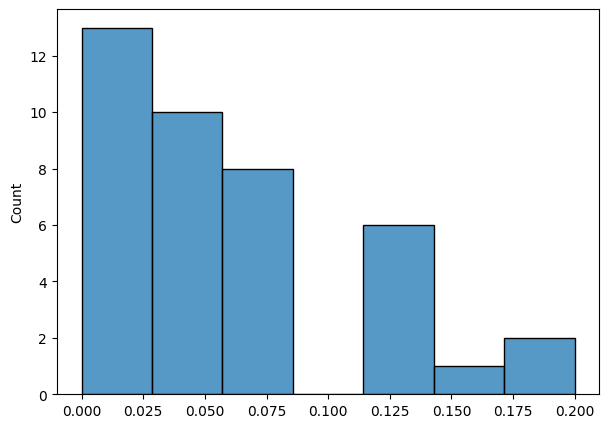

In [3]:
fig, ax = plt.subplots(figsize=(7, 5))
sns.histplot(data=veg_rates, ax=ax)
plt.show()

### Calculating *p-value*

P-value :
- The P value, or calculated probability, is the probability of finding the observed,
or more extreme, results when the null hypothesis of a study
question is true — the definition of ‘extreme’ depends on how the hypothesis is being tested.

What is the probability of getting a sample proportion where the rate of being vegetarian is at least $6\%$? The resulting probability is called as *p-value*. *p-value* evaluates how well the sample data support that the null hypothesis is true.

In mathematical expression, we will calculate the following probability:
$P(p̂_{school} \geq 6\% | H_0)$

In [4]:
# Calculating p-value
p_value = len(veg_rates[veg_rates >= 0.06]) / len(veg_rates)
print("p-value: ", p_value)

p-value:  0.425


### Compare *p-value* with *Level of Significance ($\alpha$)*

The result is statistically significant if the p-value is less than or equal to the **level of significance ($\large{\alpha}$)**.

  - "Significance" is usually defined in terms of **a probability threshold $\alpha$** (generally set to 0.05).
  - We deem a particular result significant if the probability of obtaining that result under the null distribution is less than $\alpha$. This probability is known as the **p-value**.
  - The significance level, $\alpha$, is the probability of rejecting the null hypothesis when it is true.

If the obtained p-value is less than or equal to the significance value, the null hypothesis is rejected, otherwise we **fail to reject the null hypothesis.**

In [5]:
alpha = 0.05

if p_value <= alpha:
  print("We reject Null Hypothesis")
else:
  print("We fail to reject Null Hypothesis!")

We fail to reject Null Hypothesis!


#### The Structure of a Hypothesis Test

1. Determine the hypotheses
  - **Null Hypothesis ($\large{H_0}$)**: Commonly accepted as the current fact, the hypothesis that sample observations result purely from chance.
  - **Alternative Hypothesis ($\large{H_A}$)**: The main purpose of the study, the hypothesis that you claim.

2. Collect and summarize the data into a **test statistic**.

  - Data and hypothesis determines the test type.
  - Once we have the two hypotheses, we’ll use the data to test which hypothesis we should believe.

3. Use the test statistic to determine **p-value**.

4. The result is statistically significant if p-value is less than or equal to the **level of significance ($\large{\alpha}$)**.

  - "Significance" is usually defined in terms of **a probability threshold $\alpha$** (generally set to 0.05).
  - We deem a particular result significant if the probability of obtaining that result under the null distribution is less than $\alpha$. This probability is known as the **p-value**.
  - p-values evaluate how well the sample data support that the null hypothesis is true.
  - The significance level, $\alpha$, is the probability of rejecting the null hypothesis when it is true.

If the obtained p-value is less than or equal to the significance value, the null hypothesis is rejected, otherwise we **fail to reject the null hypothesis.**

<img width="400" height="350" src="https://i.pinimg.com/originals/84/c6/7e/84c67e1a25bebdd3afad543c6bf79f89.jpg"></img>


## Cholesterol Measurements

A nutritionist suspected that her company's clients had below average cholesterol where the average cholesterol in the population is $4.6$ $mmol/L$ and standard deviation is $0.5$ $mmol/L$. To prove that, she obtained a random sample of 8 clients. These clients had a mean cholesterol level of $\bar x$ = $4.26$ $mmol/L$.

- **Null Hypothesis ($\large{H_0}$)**: Average cholesterol for her companys' clients is 4.6 mmol/L.
- **Alternative Hypothesis ($\large{H_A}$)**: Average cholesterol for her companys' clients is less than 4.6 mmol/L

To see how likely a sample like this was to happen by random chance alone, the nutritionist performed a simulation. They simulated 60 samples of 8 clients' cholesterol levels from a normal population with a mean of $4.6$ $mmol/L$ and standard deviation of $0.5$ $mmol/L$.

<Axes: xlabel='count'>

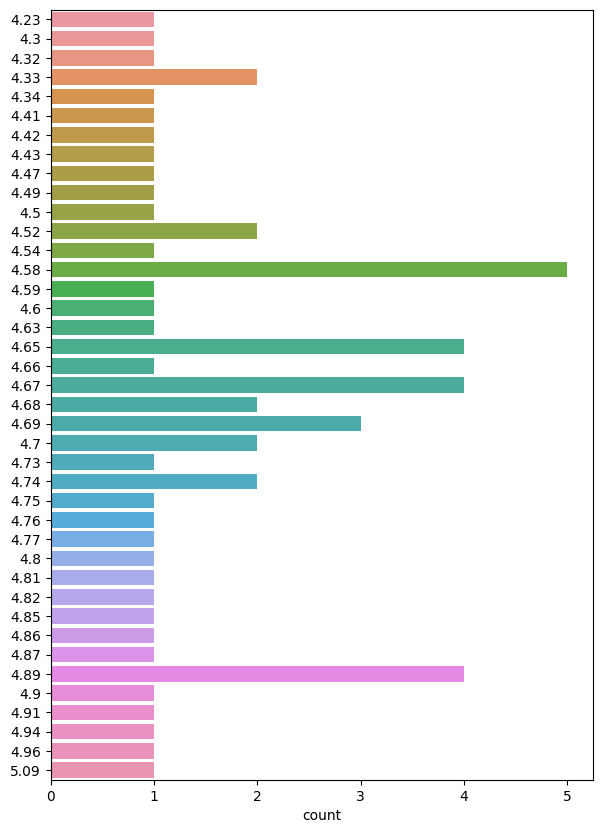

In [6]:
# sample size
n = 8

# number of simulations
num_rounds = 60

# Population mean
mean = 4.6

# Population Std
std = 0.5

# Empty array to store cholesterol averages
cholesterol_averages = []

# For each round
for i in range(num_rounds):
  # Pick a sample of 8 clients by the given mean and standard deviation
  sample = np.random.normal(mean, std, size=(n, ))
  # Calculate the mean of the sample
  chol_avg_in_sample = sample.mean()
  # Add mean to empty array
  cholesterol_averages.append(chol_avg_in_sample)

# Convert array to NumPy array
cholesterol_averages = np.array(cholesterol_averages)
# Store only 2 decimal points for sample mean
cholesterol_averages= np.around(cholesterol_averages, decimals=2)

# Plot
fig, ax = plt.subplots(figsize=(7, 10))
sns.countplot(y=cholesterol_averages, ax=ax)

Let's determine the *p-value* of the simulation.

In [7]:
# Calculating p-value
p_value = len(cholesterol_averages[cholesterol_averages <= 4.26]) / len(cholesterol_averages)
print("p-value: ", p_value)

p-value:  0.016666666666666666


We will compare the *p-value* with the level of significance ($\alpha = 0.05$)

In [8]:
alpha = 0.05

if p_value <= alpha:
  print("We reject Null Hypothesis")
else:
  print("We fail to reject Null Hypothesis!")

We reject Null Hypothesis


## Error Types

When conducting a hypothesis test there are two possible decisions: reject the null hypothesis or fail to reject the null hypothesis. You should remember though, hypothesis testing uses data from a sample to make an inference about a population. When conducting a hypothesis test we do not know the population parameters. In most cases, we don't know if our inference is correct or incorrect.

||$H_0$ is true|$H_0$ is false|
|---|---|---|
|Reject $H_0$|**Type I Error**|Correct Decision|
|Fail to reject $H_0$|Correct Decision|**Type II Error**|

In terms of a courtroom scenario:

> Type I Error: Convicting an innocent defendant.

> Type II Error: Acquitting a criminal.

Lower $\alpha$ levels mean that smaller p-values are needed to reject the null hypothesis; this makes it more difficult to reject the null hypothesis, but this also reduces the probability of committing a Type I error.

**Type I error:**
 When we reject the null hypothesis, although that hypothesis was true.
Type I error is denoted by alpha. In hypothesis testing, the normal
curve that shows the critical region is called the alpha region

**Type II errors:**
 When we accept the null hypothesis but it is false. Type II errors are
denoted by beta. In Hypothesis testing, the normal curve that shows the
acceptance region is called the beta region.

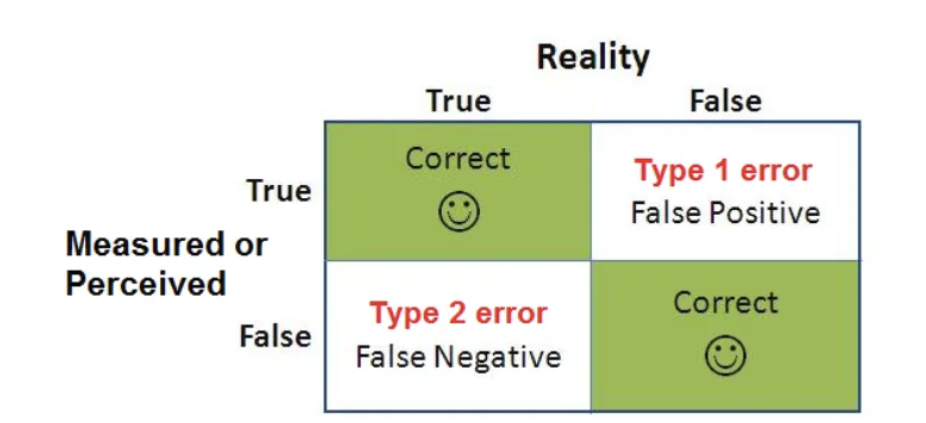

## Exercise

The ages of workers in a certain industry are approximately normally distributed with a mean of $30$ years and a standard deviation of $3.53$ years. A recruiter wondered if that held true for workers in a certain state. The recruiter took a random sample of $n=3$ of these workers from the state, and the mean age of the workers in the sample was $\bar x=26$.

Compare the *p-value* with the level of significance. But this time, take $\alpha = 0.03$

In [9]:
null_hypothesis = "Mean age of workers in a certain state is 30"
alternative_hypothesis = "Mean age of workers in a certain state is less than 30"

print("Null Hypothesis: ", null_hypothesis)
print("Alternative Hypothesis: ", alternative_hypothesis)

Null Hypothesis:  Mean age of workers in a certain state is 30
Alternative Hypothesis:  Mean age of workers in a certain state is less than 30


To see how likely a sample like theirs was to occur by random chance alone, the recruiter performed a simulation. They simulated $200$ samples of $n=3$, ages from a normal population with a mean of $30$ years and standard deviation of $3.53$ years. They recorded the mean of the ages in each sample. Here are the sample means from their $200$ samples (Store 1 decimal point for age mean of each sample):

<Axes: xlabel='count'>

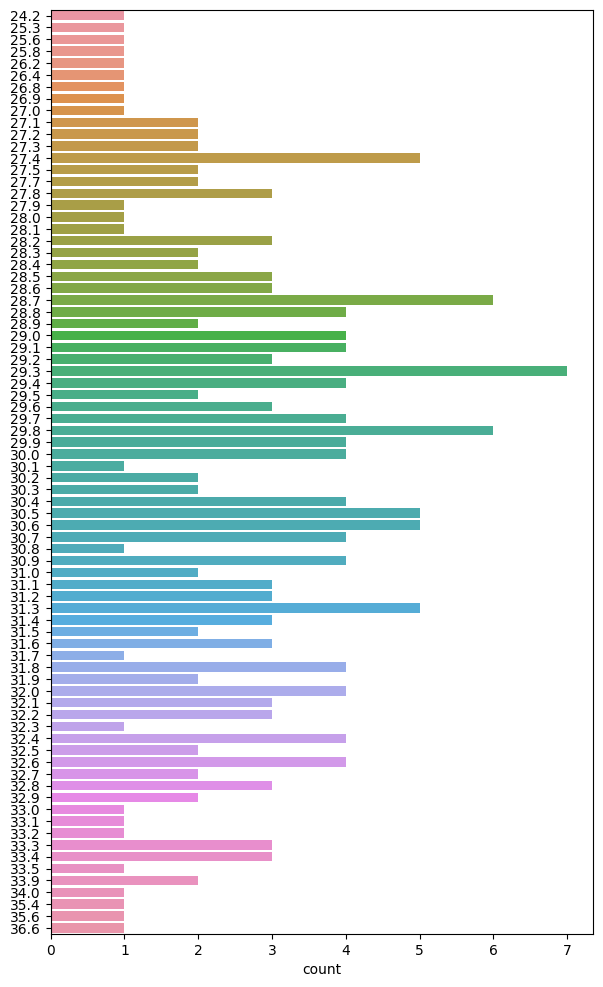

In [10]:
# sample size
n = 3

# number of rounds in simulation
num_rounds = 200

# Population mean
mean = 30

# Population Std
std = 3.53

# Empty array to store age means
age_mean_arr = []

# For each round
for i in range(num_rounds):
  # Pick a sample of 3 workers by the given mean and standard deviation
  sample = np.random.normal(mean, std, size=(n, ))
  # Calculate the mean of the sample
  worker_mean_in_sample = sample.mean()
  # Add mean to empty array
  age_mean_arr.append(worker_mean_in_sample)

# Convert array to NumPy array
age_mean_arr = np.array(age_mean_arr)
# Store only 1 decimal points for sample mean
age_mean_arr= np.around(age_mean_arr, decimals=1)

# Plot
fig, ax = plt.subplots(figsize=(7, 12))
sns.countplot(y=age_mean_arr, ax=ax)

Calculate the *p-value*.

In [11]:
# Calculating p-value
p_value = len(age_mean_arr[age_mean_arr <= 26]) / len(age_mean_arr)
print("p-value: ", p_value)

p-value:  0.02


In [12]:
alpha = 0.03

if p_value <= alpha:
  print("We reject Null Hypothesis")
else:
  print("We fail to reject Null Hypothesis!")

We reject Null Hypothesis


# Widely used hypothesis testing methods

1. Z-test:
* Used for comparing population mean and a sample mean to determine if there is a significant difference.
2. T-test
* Used to compare means of two groups to assess if there is a statistically significant difference between them.
3. A/B
* Technique for comparing two versions of a webpage or app to determine which one performs better.
4. ANOVA
* Used to compare means of more than two groups to determine if there are any statistically significant differences.
5. Chi-Square test
* Used for testing the association between categorical variables.

### What kind of test should you use?

In order to answer this question, first you need to know what distribution it follows. Because the different tests assume that data follows a specific distribution.

One of the most famous distributions is the so called Bell Curve. In this distribution the data is centered at the mean, median and mod at the same time.

#### Plotting a Probability Density Function

Firstly, let's plot how a **normal distribution** look like. In order to do that we need to determine the values for mean and std.


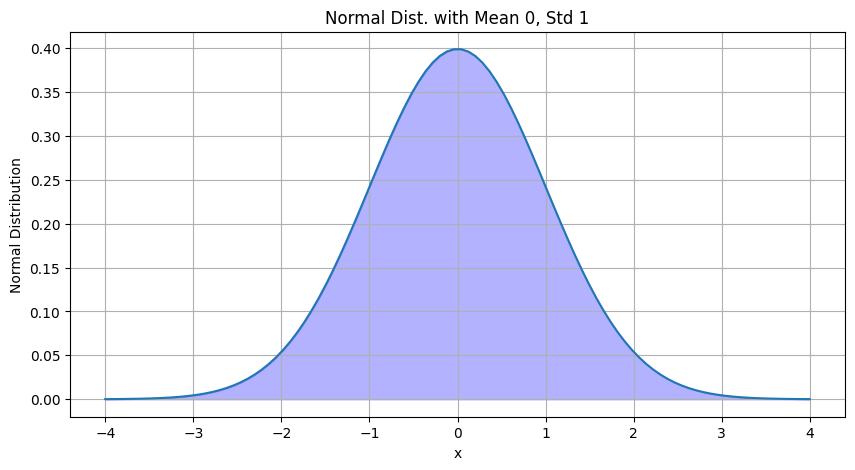

In [13]:
# mean and std values from the sample
mean = 0
std = 1
n = 100
offset = 4*std

# the x-axis ticks of the plot
# generates 100 equally separated ticks
x = np.linspace(mean-offset, mean+offset, n)

# probability density function
# of the given normal dist.
y = stats.norm.pdf(x, mean, std)

plt.figure(figsize=(10, 5))
plt.plot(x,y)
# put grids on the figure
plt.grid()
plt.xlabel("x")
plt.ylabel("Normal Distribution")
# filling the area below the line
plt.fill_between(x, y, alpha=0.3, color="b")
plt.title(f"Normal Dist. with Mean {mean}, Std {std}")
plt.show()

## **1. Z-Score**

You would use Z-test if:
- Your sample size is greater than 30
- Data points should be independent from each other
- Your data should be normally distributed
- Your data should be randomly selected from a population
- Sample sizes should be equal if possible

### An Experiment on The Effect of Drugs

A neurologist is testing the effect of a drug on response time by injecting 100 rats a unit dose of drug, subjecting each to a neurological stimulus and recording their response time. The neurologist knows that **the mean response time for rats not injected with the drug is 1.2 seconds**. **The mean of the 100 injected rats' response time is 1.05 seconds with a sample standard deviation of 0.5 seconds**. Do you think that the drug has an effect on the response time?


#### Sampling Distribution STD

Here, we take a sample from the population and measure the response time and obtain sample statistics. In order to assess the extremeness of the drugged sample, we need to evalute it in the sampling distribution.

Due to the Central Limit Theorem, we know that the sampling distribution of mean response times will approximate to a normal distribution with mean set to population mean ($\mu$) and std to $\sigma /\sqrt{N}$, where $\sigma$ is population std and N is the sample size.

We can use the sample standard deviation to estimate the sampling distribution std with the formula below. Although, we do not know the population std, we can use the sample std as an estimator because of the fair sample size.

$\large{\sigma_{sampling \, dist.} = \frac{\sigma_{population}}{\sqrt{sample \; size}}}$

Now, let's first find the std of sampling distribution and plot it.

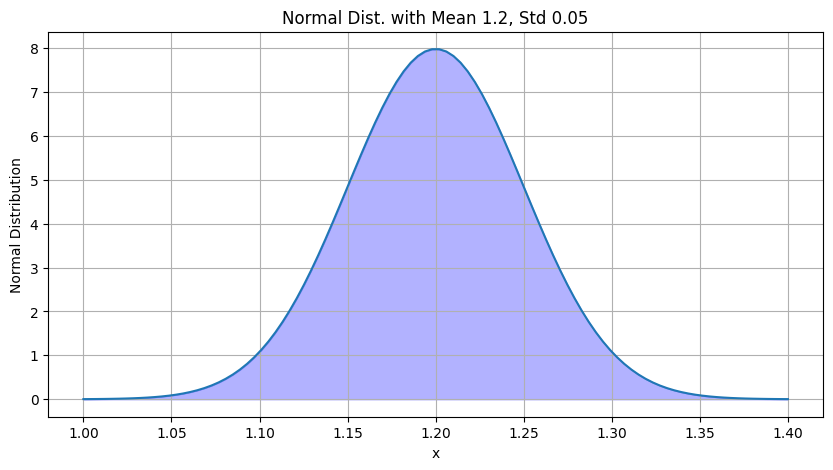

In [14]:
# mean and std values from the sample
n = 100
mean = 1.2
std = 0.5 / np.sqrt(n)
offset = 4*std

# the x-axis ticks of the plot
# generates 100 equally separated ticks
x = np.linspace(mean - offset, mean + offset, n)

# probability density function
# of the given normal dist.
y = stats.norm.pdf(x, mean, std)

plt.figure(figsize=(10, 5))
plt.plot(x,y)
# put grids on the figure
plt.grid()
plt.xlabel("x")
plt.ylabel("Normal Distribution")
plt.fill_between(x, y, alpha=0.3, color="b")
plt.title(f"Normal Dist. with Mean {mean}, Std {std}")
plt.show()

Now we need a method to compare the drugged sample with the sampling distribution mean and tell how significantly distant the means are from each other.

We can use the **z-scores** and find how many standard deviations away the sample mean (drugged rats) is from the population mean. To calculate the z-scores, you can use the formula below.

$\Large{Z = \frac{\bar{x}_{sample} - \mu_{sampling \, dist.}}{\sigma_{sampling \, dist.}}}$

So now, let's first calculate the z-score and find out how many standard deviations away our sample mean is.

In [15]:
# mean and std values from the sample
n = 100
mean = 1.2
std = 0.5 / np.sqrt(n)

# sample mean (drugged rats)
sample_mean = 1.05

# calculating the z-score
z_score = (sample_mean - mean) / std

print("z-score: {}".format(z_score))

z-score: -2.9999999999999982


#### Locating The Sample

With the z-score at hand, we can further display how distant our sample mean is from the population mean.

On top of the derived plot above, put a vertical line corresponding to **population_mean - (z-score*population_std)**, so that we can observe where the sample mean is located.

In matplotlib you can use `plt.axvline(location_on_x_axis, color="red")` function to put a vertical line on the plot. You may check this [link](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.axvline.html) to learn more about it.

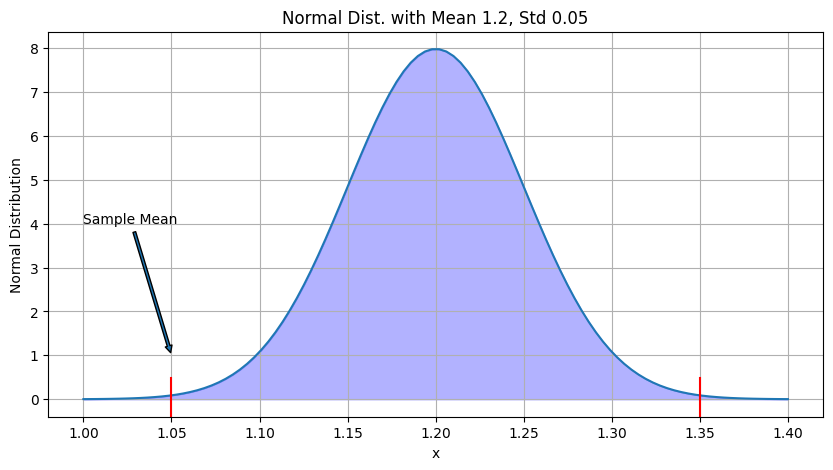

In [16]:
# mean and std values from the sample
n = 100
mean = 1.2
std = 0.5 / np.sqrt(n)
offset = 4*std

# sample mean (drugged rats)
sample_mean = 1.05

# calculating the z-score
z_score = (sample_mean - mean) / std

# the x-axis ticks of the plot
# generates 100 equally separated ticks
x = np.linspace(mean - offset, mean + offset, n)

# probability density function
# of the given normal dist.
y = stats.norm.pdf(x,mean,std)

plt.figure(figsize=(10, 5))
plt.plot(x,y)
# put grids on the figure
plt.grid()
plt.xlabel('x')
plt.ylabel('Normal Distribution')
plt.fill_between(x, y, alpha=0.3, color='b')
# display the z-score locations
plt.axvline(mean - z_score*std, ymax=0.1, color="red")
plt.axvline(mean + z_score*std, ymax=0.1, color="red")
# annotate the sample mean
plt.annotate(
    "Sample Mean", # annotation text
    xy=(mean + z_score*std, 1), # annotated coordinate
    xytext=(1, 4), # annotation text coordinate
    arrowprops={"arrowstyle": "simple"}) # arrow style
plt.title('Normal Dist. with Mean {}, Std {}'.format(mean, std))
plt.show()

![](https://mindcul.com/wp-content/uploads/2019/03/68-95-997.png)

At this point, we know what our z-score is. We also found out that the sample mean is _z-score_ standard deviation away from the population mean. **So what is the propability of getting a result this extreme?** We can utilize the z-table to obtain the target probability value. For instance, the figure above shows that the area which is one standard deviation away from the mean has a 0.68 probability. So we can compute the probability of the area we obtained with the z-score.



In [18]:
# calculating the probability
# multiply by 2 to consider both ends
prob = 2*stats.norm.cdf(z_score)

print(f"probability: {prob}")

probability: 0.0026997960632602026


Based on the obtained results, what is your take on the first question? Do you think that the drug has an effect on the response time?

### One-tailed vs Two-tailed Hypothesis Test

#### Test Types

- In a **one-tailed hypothesis test**, we choose one direction for our alternative hypothesis: we either hypothesize that the test statistic is “significantly big”, or that the test statistic is “significantly small”.

- In a **two-tailed hypothesis test**, our alternative hypothesis encompasses both directions: we hypothesize that the test statistic is simply different from the predicted value.

![](https://www.fromthegenesis.com/wp-content/uploads/2018/06/Types-of-Hypothesis-Tests.jpg)


#### A Small Example on Hypotheses

**Question**:  Do participants lose weight following a weight-loss intervention?

Data were collected from one group of participants before and after a weight-loss intervention. Data were paired by participant.  Assuming that **$x_1$ is an individual's weight before the intervention** and **$x_2$ is their weight at the end of the study**, **if they lost weight then $x_1 - x_2$ would be a positive number** (i.e., greater than 0). Thus, this is a right-tailed test. Because we are testing their mean difference, the parameter that we should write in our hypotheses is $\mu_d$ **where $\mu_d$ is the mean weight change** (before-after) in the population.

Our hypotheses are:

- $\large H_0: \mu_d = 0$
- $\large H_A: \mu_d > 0$


[source](https://online.stat.psu.edu/stat200/lesson/5/5.2/5.2.1)


### Visualizing Students' Performance

In "StudentsPerformance.csv", each row corresponds to a student with associated exam scores. In addition, we also have the ethnicity and the education level of their parents.

In [19]:
from google.colab import drive
drive.mount("./drive", force_remount=True)

path_prefix = "./drive/My Drive/"

Mounted at ./drive


In [20]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/SABANCI/Recitations/StudentsPerformance.csv")

In [21]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


Now, let's check if there is any significant difference between the students who completed the preparation course and those who did not.  
For this exercise, our focus is on reading scores.

In [22]:
test_type = "reading score"

comp_studs = df[df["test preparation course"] == "completed"][test_type]  # completed students
none_studs = df[df["test preparation course"] == "none"][test_type]       # none students

In [23]:
print(f"mean score of students who completed the course: {comp_studs.mean():.2f}")

mean score of students who completed the course: 73.89


In [24]:
print(f"mean score of students who did not complete the course: {none_studs.mean():.2f}")

mean score of students who did not complete the course: 66.53


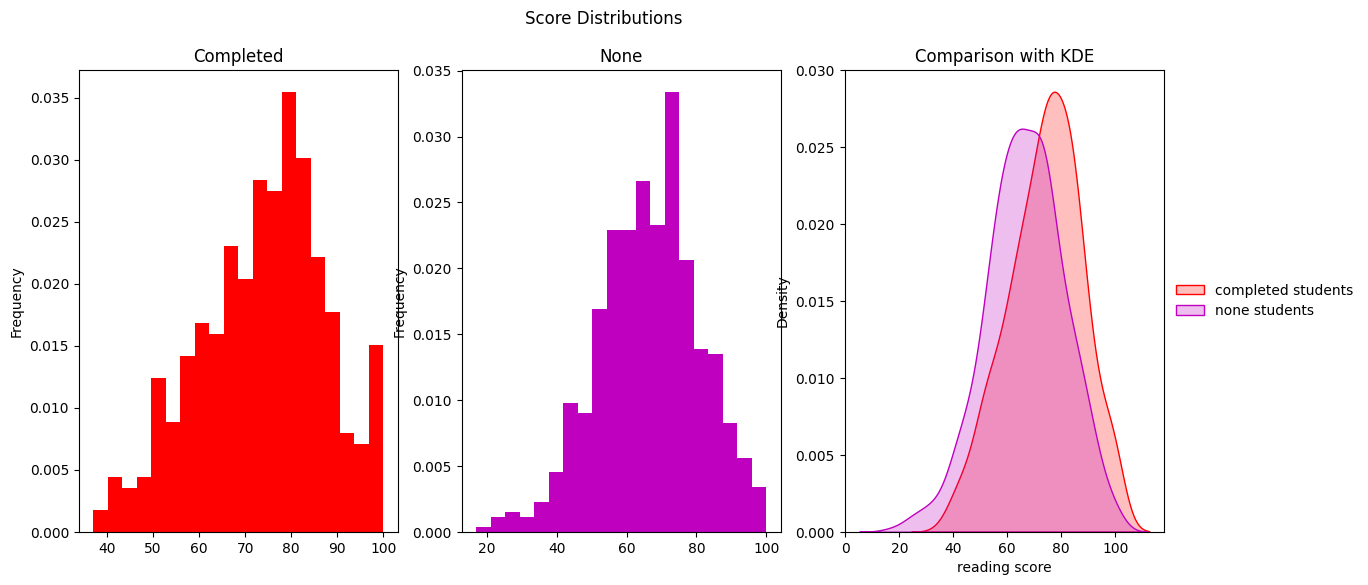

In [25]:
fig, ax = plt.subplots(1, 3, figsize=(14,6))  # a figure with 1 row and 3 columns
                                              # ax variable stores a list with 3 elements
                                              # each element in ax correspons to chart

comp_studs.plot(kind="hist", ax=ax[0], bins=20, label="completed", color="r", density=True)
ax[0].set_title("Completed")

none_studs.plot(kind="hist", ax=ax[1], bins=20, label="none", color="m", density=True)
ax[1].set_title("None")

sns.kdeplot(comp_studs, fill=True, label="completed students", ax=ax[2], color="r")
sns.kdeplot(none_studs, fill=True, label="none students", ax=ax[2], color="m")
ax[2].set_title("Comparison with KDE")

plt.legend(loc='center left',
           bbox_to_anchor=(1, 0.5),
           frameon=False)
plt.suptitle("Score Distributions")
plt.show()

From the figure above, we can see that the students who took the course obtained better results on average compared to the one who did not.  
Now, let's show this difference statistically by applying a significance test.

## **2. T-Test**

It is used to determine if there is a significant difference between the means of two groups.

- **One-Sample (Paired) T-test**
 - The One-Sample T-test determines whether the sample mean is statistically different from a known or hypothesised population mean.

- **Two-Sample (Unpaired) T-test**
 - Determines whether the average difference between two groups is really significant or if it is due to random chance. So, it is used to compare the mean of two independent groups. It is employed to analyze the results from ***A/B tests*** as well.

Now, let's get back to the students data set. We can apply two-sample t-test to samples drawn from students data set.

In [30]:
stats.ttest_ind(comp_studs, none_studs, equal_var=False)  # since we have not equal variances

TtestResult(statistic=8.004132353965, pvalue=4.388808024290596e-15, df=775.3693595698406)

If we set the significance level as 0.05, we can reject the null hypothesis. In addition, the test score is positive which indicates that the mean score for students who completed the course is higher than those who did not.

## **3. A/B Testing**
It is also known as split testing and is a randomized experimentation process in which two or more versions of a variable (web page, page element, etc.) are shown to different segments of website visitors at the same time to see which version has the greatest impact and drives the most business metrics.

![](https://qualaroo.com/app/uploads/2019/08/ab@2x.png)



Let's say that we want to increase the clicks for starting a free-trial on our website. Two designs were prepared by a creative agency to run an A/B test:

![](https://designforfounders.com/wp-content/uploads/2016/06/image08-1.jpg)

Our data consists of user ids, their group (control and test), and whether they signed up or not:

In [31]:
control_df = pd.DataFrame({'group':'control',
                          'user_id':np.random.choice(range(1500, 4700), 500, replace=False),
                          'clicked':np.random.choice([0, 1], 500, p=[0.8, 0.2])})

test_df = pd.DataFrame({'group':'test',
                          'user_id':np.random.choice(range(4700, 9800), 500, replace=False),
                          'clicked':np.random.choice([0, 1], 500, p=[0.5, 0.5])})

df = pd.concat([control_df,test_df])
df = df.reset_index(drop=True)
df.head()

,group,user_id,clicked
0,control,2688,0
1,control,3261,1
2,control,1747,0
3,control,3796,0
4,control,4336,0


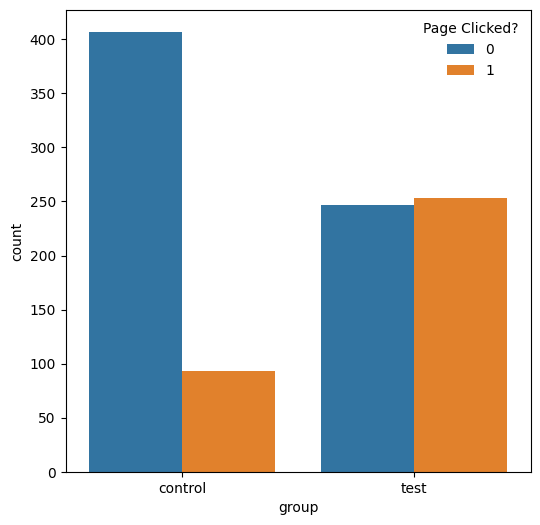

In [33]:
plt.figure(figsize=(6,6))
sns.countplot(x='group',
              hue='clicked',
              data=df)
plt.legend(frameon=False,
           fancybox=True,
           title='Page Clicked?')
plt.show()

In [34]:
stats.ttest_ind(df[df['group']=='control']['clicked'],
                df[df['group']=='test']['clicked'])

TtestResult(statistic=-11.283111475668516, pvalue=7.140431338221556e-28, df=998.0)

## **4. ANOVA**

Let's consider a hypothetical example where we have data from three different teaching methods (A, B, and C) and we want to determine if there is a significant difference in the test scores of students taught using these methods. We will use the one-way ANOVA test to analyze the data.

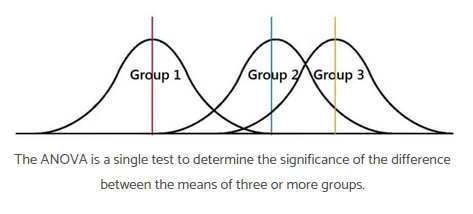

In [35]:
import numpy as np
from scipy.stats import f_oneway

# Generate example data
np.random.seed(42)  # Setting seed for reproducibility

# Simulating test scores for three teaching methods
method_a = np.random.normal(loc=70, scale=10, size=30)
method_b = np.random.normal(loc=75, scale=10, size=30)
method_c = np.random.normal(loc=80, scale=10, size=30)

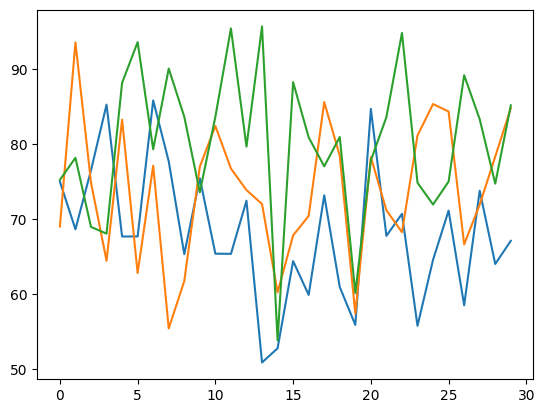

In [36]:
plt.plot(method_a)
plt.plot(method_b)
plt.plot(method_c)

plt.show()

In [37]:
# Performing one-way ANOVA
statistic, p_value = f_oneway(method_a, method_b, method_c)

# Displaying the results
print("ANOVA Statistic:", statistic)
print("P-value:", p_value)

ANOVA Statistic: 12.20952551797281
P-value: 2.1200748140507065e-05


In [38]:
# Interpreting the results
alpha = 0.05  # significance level
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in the test scores.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in the test scores.")

Reject the null hypothesis. There is a significant difference in the test scores.


## **5. Chi-Square Test**

The test is applied when you have two categorical variables from a single population. It is used to determine whether there is a significant association between the two variables.

<a href="https://ibb.co/j4gR82w"><img src="https://i.ibb.co/F7gVhMY/chisquare.png" alt="chisquare" border="0"></a>

In [39]:
from scipy.stats import chi2_contingency

The above function returns:

**chi2float**: The test statistic.

**pfloat**: The p-value of the test

**dofint**: Degrees of freedom

**expectedndarray**: The expected frequencies, based on the marginal sums of the table

For more information: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html

In [40]:
sample_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/SABANCI/Recitations/chi_square_test.csv', sep=';')

In [41]:
contingency_table = pd.crosstab(index = sample_data.discipline,
                                columns = sample_data.level_of_technical_writing_expertise)
contingency_table

level_of_technical_writing_expertise,beginner,expert,intermediate
discipline,,,
hum,11,25,17
soc_sci,47,9,12
stem,10,35,13


In [42]:
chi2, p, dof, ex = chi2_contingency(contingency_table)
print("p-value:", p)

p-value: 3.252336580335862e-10


### Example: Chi Square Test

In [43]:
df_c = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/SABANCI/Recitations/happiness.csv")

In [44]:
len(df_c)

100

In [45]:
df_c.head()

,gender,status
0,male,happy
1,female,very happy
2,female,neutral
3,male,unhappy
4,male,very unhappy


##### Calculating the Cross Tabulation Table

- Add the `happiness.csv` file as a shortcut to your drive.

- Calculate the cross tabulation between attributes `gender` and `status`. The result should look the output below. *Hint: You may use the [crosstab](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.crosstab.html) function to obtain the required dataframe.*

  ![](https://i.ibb.co/gvPQCLh/kek.png)

In [46]:
# your code

crosstab_df = pd.crosstab(df_c["gender"], df_c["status"])
crosstab_df

status,happy,neutral,unhappy,very happy,very unhappy
gender,,,,,
female,7,14,10,12,6
male,11,8,11,10,11


- Plot a grouped bar chart in which happiness status counts are displayed by gender by utilizing the resulting cross tabulation dataframe.

The result should look like the figure below.

![](https://i.ibb.co/f19DDWc/pp-1.png)

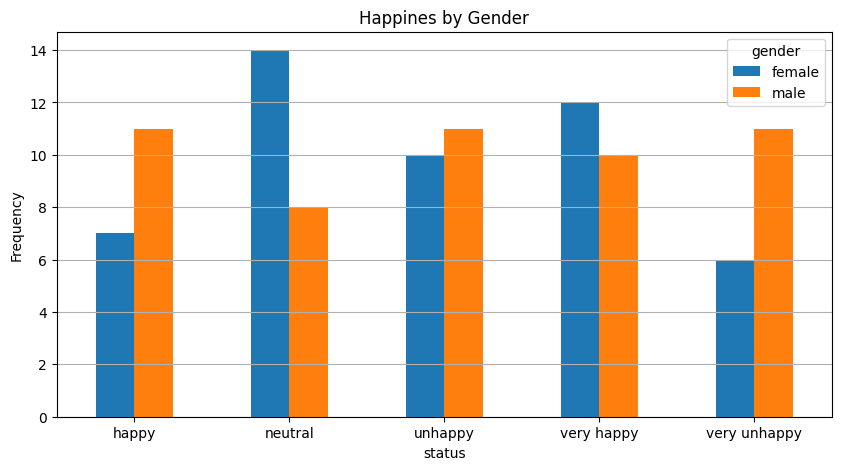

In [47]:
## your code

ax = crosstab_df.T.plot.bar(figsize=(10, 5), rot=0)
ax.set_ylabel("Frequency")
ax.set_title("Happines by Gender")
ax.grid(axis="y");

##### Performing the Test

In the second part of the exercise, you are going to perform the test, with the help of [`chi2_contingency`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html) from scipy.

- Perform the test and based on the obtained values state your verdict with $\alpha$ (level of significance) set to 0.05.


In [ ]:
# your code

alpha = 0.05
chi2_test_stat, p_value, dof, expected_freqs = stats.chi2_contingency(crosstab_df)

result = "independent" if p_value > alpha else "not independent"
print(f"Gender and happiness status are {result}")

Gender and happiness status are independent
